In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group ,labels

In [3]:
group,labels = createDataSet()
print(group[:,0])
labels

[ 1.  1.  0.  0.]


['A', 'A', 'B', 'B']

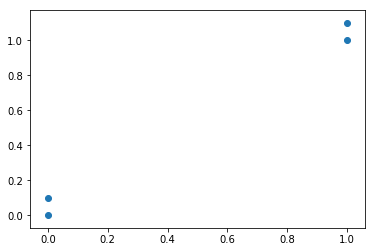

In [4]:
plt.scatter(group[:,0],group[:,1])

### K邻近算法伪代码
1. 计算已知类别数据集中的每个点与当前点之间的距离
2. 按照距离递增次序排序
3. 选取与当前点距离最小的K个点
4. 确定前K个点中所在类别的出现频率
5. 返回这K个点出现频率最高的类别作为当前点的预测分类

### KNN 开发流程： 
+ 收集数据：任何方法
+ 准备数据：距离计算所需要的数值，最好是结构化的数据格式
+ 分析数据：任何方法
+ 训练算法：此步骤不适用于 k-近邻算法
+ 测试算法：计算错误率
+ 使用算法：输入样本数据和结构化的输出结果，然后运行 k-近邻算法判断输入数据分类属于哪个分类，最后对计算出的分类执行后续处理

### 算法特点：  
+ 优点：精度高、对异常值不敏感、无数据输入假定
+ 缺点：计算复杂度高、空间复杂度高
+ 适用数据范围：数值型和标称型

In [5]:
X_train = pd.DataFrame(group,index=labels,columns=['x','y'])
X_train

x    y
A  1.0  1.1
A  1.0  1.0
B  0.0  0.0
B  0.0  0.1

In [6]:
X_test = np.array([0.2,0.4])
X_test

array([ 0.2,  0.4])

In [7]:
#1.计算每个点与当前点之间的距离
X_train['Dis'] = np.sqrt(((X_train.x-X_test[0])**2+(X_train.y-X_test[1])**2))
X_train

x    y       Dis
A  1.0  1.1  1.063015
A  1.0  1.0  1.000000
B  0.0  0.0  0.447214
B  0.0  0.1  0.360555

In [8]:
X_train.sort_values('Dis')#2.距离递增排序

x    y       Dis
B  0.0  0.1  0.360555
B  0.0  0.0  0.447214
A  1.0  1.0  1.000000
A  1.0  1.1  1.063015

In [9]:
X_train.sort_values('Dis').iloc[:3]#3.选取距离最小的前3个点

x    y       Dis
B  0.0  0.1  0.360555
B  0.0  0.0  0.447214
A  1.0  1.0  1.000000

In [10]:
y = X_train.sort_values('Dis').iloc[:3].index.to_series().mode()#4&5.找出出现频率最高的类别作为当前点的预测分类
print('The point [%.2f,%.2f] is belong to %s'%(X_test[0],X_test[1],y[0]))

The point [0.20,0.40] is belong to B


In [11]:
def knn(X_test,X_train,n):
    X_train['Dis'] = np.sqrt(((X_train.x-X_test[0])**2+(X_train.y-X_test[1])**2))
    y = X_train.sort_values('Dis').iloc[:n].index.to_series().mode()
    print('The point [%.2f,%.2f] is belong to %s'%(X_test[0],X_test[1],y[0]))
    return y[0]

In [12]:
knn(X_test,X_train,3)

The point [0.20,0.40] is belong to B


'B'

### 使用KNN改进约会网站的配对效果
+ 收集数据：提供文本文件
+ 准备数据：使用 Python 解析文本文件
+ 分析数据：使用 Matplotlib 画二维散点图
+ 训练算法：此步骤不适用于 k-近邻算法
+ 测试算法：使用海伦提供的部分数据作为测试样本。
>测试样本和非测试样本的区别在于：  
> 测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记为一个错误。
+ 使用算法：产生简单的命令行程序，然后海伦可以输入一些特征数据以判断对方是否为自己喜欢的类型。

In [13]:
names = ['flyMiles','gametime','Icecreams','labels']
data  = pd.read_table('.\data\datingTestSet2.txt',names=names,sep='\t',header=None)
data=data.set_index('labels')

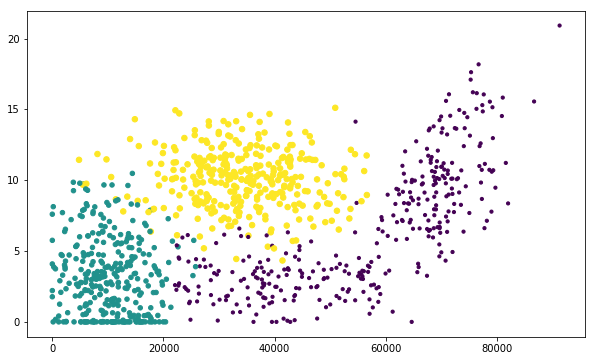

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(data['flyMiles'],data['gametime'],10*data.index,10*data.index)


In [15]:
data.describe()

flyMiles     gametime    Icecreams
count   1000.000000  1000.000000  1000.000000
mean   33635.421000     6.559961     0.832073
std    21957.006833     4.243618     0.497239
min        0.000000     0.000000     0.001156
25%    13796.000000     2.933963     0.408995
50%    31669.000000     6.595204     0.809420
75%    47716.250000    10.056500     1.272847
max    91273.000000    20.919349     1.695517

In [18]:
regdata= (data-data.min())/data.max()-data.min()

In [19]:
X_train = regdata.iloc[:900].copy()

In [20]:
X_train[:10]

flyMiles  gametime  Icecreams
labels                               
3       0.448325  0.398051   0.560794
2       0.158733  0.341955   0.985415
1       0.285429  0.068925   0.473017
1       0.823201  0.628480   0.251161
1       0.420102  0.079820   0.077369
1       0.799722  0.484802   0.607389
3       0.393851  0.326530   0.713691
3       0.467455  0.634645   0.318938
1       0.739507  0.412612   0.440079
3       0.388757  0.586690   0.887598

In [28]:
X_test =regdata.iloc[900].copy()

In [27]:
X_test

flyMiles     0.513766
gametime     0.170320
Icecreams    0.260847
Name: 1, dtype: float64

In [25]:
def knnpredictdating(X_train,X_test,n):
    X_train['Dis'] = np.sqrt((X_train.flyMiles-X_test[0])**2+(X_train.gametime-X_test[1])**2+(X_train.Icecreams-X_test[2])**2)#计算距离
    y = X_train.sort_values('Dis').iloc[:50].index.to_series().mode()#排序并求众数
    #print('The point [%.2f,%.2f,%.2f] is belong to %s'%(X_test[0],X_test[1],X_test[2],y[0]))
    return y[0]

In [26]:
knnpredictdating(X_train,X_test.iloc[0],100)

IndexError: invalid index to scalar variable.

In [35]:
X_train = regdata.iloc[1:900].copy()
X_test = regdata.iloc[900:].copy()
result =[]
for x in range(100):
    y = knnpredictdating(X_train,X_test.iloc[x],1000)
    result.append(y)

MSE = sum((np.array(result)-np.array(X_test.index.tolist()))**2)/len(result)
    
MSE#均方差

0.16

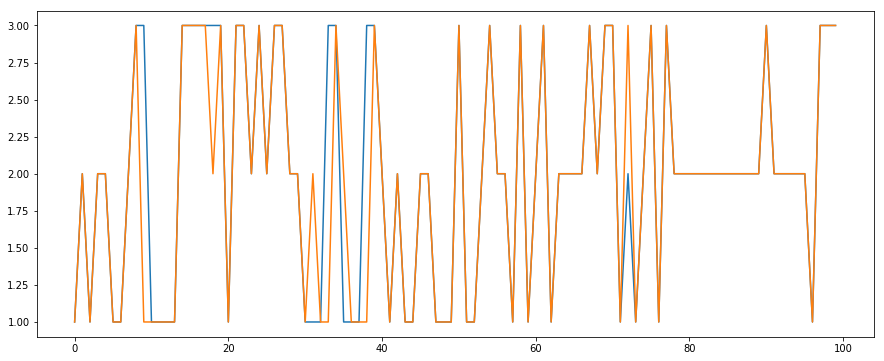

In [33]:
plt.figure(figsize=(15,6))
plt.plot(np.array(X_test.index.tolist()))
plt.plot(np.array(result))

### 手写数字识别系统


In [44]:
#准备数据，将文本图像转为向量
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [47]:
#测试img2vector
testVec = img2vector('./data/digits/trainingDigits/0_0.txt')

In [59]:
from numpy import *
# 导入科学计算包numpy和运算符模块operator
import operator
from os import listdir
from collections import Counter

In [63]:
def handwritingClassTest():
    #1.导入数据
    hwLabels=[]
    trainingFileList = listdir('./data/digits/trainingDigits')
    m = len(trainingFileList)
    trainingMat = np.zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:]=img2vector('./data/digits/trainingDigits/%s'%fileNameStr)
    
    # 2. 导入测试数据
    testFileList = listdir('./data/digits/testDigits')  # iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('./data/digits/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print("\nthe total number of errors is: %d" % errorCount)
    print("\nthe total error rate is: %f" % (errorCount / float(mTest)))

In [64]:
def classify0(inX, dataSet, labels, k):
    """
    inx[1,2,3]
    DS=[[1,2,3],[1,2,0]]
    inX: 用于分类的输入向量
    dataSet: 输入的训练样本集
    labels: 标签向量
    k: 选择最近邻居的数目
    注意：labels元素数目和dataSet行数相同；程序使用欧式距离公式.
    预测数据所在分类可在输入下列命令
    kNN.classify0([0,0], group, labels, 3)
    """

    # -----------实现 classify0() 方法的第一种方式----------------------------------------------------------------------------------------------------------------------------
    # 1. 距离计算
    dataSetSize = dataSet.shape[0]
    # tile生成和训练样本对应的矩阵，并与训练样本求差
    """
    tile: 列-3表示复制的行数， 行-1／2表示对inx的重复的次数
    In [8]: tile(inx, (3, 1))
    Out[8]:
    array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])
    In [9]: tile(inx, (3, 2))
    Out[9]:
    array([[1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3]])
    """
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    """
    欧氏距离： 点到点之间的距离
       第一行： 同一个点 到 dataSet的第一个点的距离。
       第二行： 同一个点 到 dataSet的第二个点的距离。
       ...
       第N行： 同一个点 到 dataSet的第N个点的距离。
    [[1,2,3],[1,2,3]]-[[1,2,3],[1,2,0]]
    (A1-A2)^2+(B1-B2)^2+(c1-c2)^2
    """
    # 取平方
    sqDiffMat = diffMat ** 2
    # 将矩阵的每一行相加
    sqDistances = sqDiffMat.sum(axis=1)
    # 开方
    distances = sqDistances ** 0.5
    # 根据距离排序从小到大的排序，返回对应的索引位置
    # argsort() 是将x中的元素从小到大排列，提取其对应的index（索引），然后输出到y。
    # 例如：y=array([3,0,2,1,4,5]) 则，x[3]=-1最小，所以y[0]=3,x[5]=9最大，所以y[5]=5。
    # print 'distances=', distances
    sortedDistIndicies = distances.argsort()
    # print 'distances.argsort()=', sortedDistIndicies

    # 2. 选择距离最小的k个点
    classCount = {}
    for i in range(k):
        # 找到该样本的类型
        voteIlabel = labels[sortedDistIndicies[i]]
        # 在字典中将该类型加一
        # 字典的get方法
        # 如：list.get(k,d) 其中 get相当于一条if...else...语句,参数k在字典中，字典将返回list[k];如果参数k不在字典中则返回参数d,如果K在字典中则返回k对应的value值
        # l = {5:2,3:4}
        # print l.get(3,0)返回的值是4；
        # Print l.get（1,0）返回值是0；
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # 3. 排序并返回出现最多的那个类型
    # 字典的 items() 方法，以列表返回可遍历的(键，值)元组数组。
    # 例如：dict = {'Name': 'Zara', 'Age': 7}   print "Value : %s" %  dict.items()   Value : [('Age', 7), ('Name', 'Zara')]
    # sorted 中的第2个参数 key=operator.itemgetter(1) 这个参数的意思是先比较第几个元素
    # 例如：a=[('b',2),('a',1),('c',0)]  b=sorted(a,key=operator.itemgetter(1)) >>>b=[('c',0),('a',1),('b',2)] 可以看到排序是按照后边的0,1,2进行排序的，而不是a,b,c
    # b=sorted(a,key=operator.itemgetter(0)) >>>b=[('a',1),('b',2),('c',0)] 这次比较的是前边的a,b,c而不是0,1,2
    # b=sorted(a,key=opertator.itemgetter(1,0)) >>>b=[('c',0),('a',1),('b',2)] 这个是先比较第2个元素，然后对第一个元素进行排序，形成多级排序。
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]
      # ------------------------------------------------------------------------------------------------------------------------------------------
    # 实现 classify0() 方法的第二种方式

    # """
    # 1. 计算距离
    
    # 欧氏距离： 点到点之间的距离
    #    第一行： 同一个点 到 dataSet的第一个点的距离。
    #    第二行： 同一个点 到 dataSet的第二个点的距离。
    #    ...
    #    第N行： 同一个点 到 dataSet的第N个点的距离。

    # [[1,2,3],[1,2,3]]-[[1,2,3],[1,2,0]]
    # (A1-A2)^2+(B1-B2)^2+(c1-c2)^2
    
    # inx - dataset 使用了numpy broadcasting，见 https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html
    # np.sum() 函数的使用见 https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html
    # """
	#   dist = np.sum((inx - dataset)**2, axis=1)**0.5
    
    # """
    # 2. k个最近的标签
    
    # 对距离排序使用numpy中的argsort函数， 见 https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sort.html#numpy.sort
    # 函数返回的是索引，因此取前k个索引使用[0 : k]
    # 将这k个标签存在列表k_labels中
    # """
    # k_labels = [labels[index] for index in dist.argsort()[0 : k]]
	# """
    # 3. 出现次数最多的标签即为最终类别
    
    # 使用collections.Counter可以统计各个标签的出现次数，most_common返回出现次数最多的标签tuple，例如[('lable1', 2)]，因此[0][0]可以取出标签值
	# """
    # label = Counter(k_labels).most_common(1)[0][0]
    # return label

    # ------------------------------------------------------------------------------------------------------------------------------------------


In [65]:
trainingMat = handwritingClassTest()

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answe

the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answe

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answe

the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answe

the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answe

the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 9
the classifier came back with: 9, the real answe

In [53]:
trainingMat.shape

(1934, 1024)

In [62]:
handwritingClassTest()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])